In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

### Read and visualize data

In [3]:
# All paths are relative. please change the current directory as per your file tree.

# Read in data as a 2, 100, 100 vector field'''
velocity= torch.load('v0.pt').numpy()
print("Dimension of velocity V0: ", velocity.shape)

# Read in data as a 1, 100, 100  image
source= torch.load('source.pt').numpy()
print("Dimension of image: ", source.shape)

Dimension of velocity V0:  (2, 100, 100)
Dimension of image:  (100, 100)


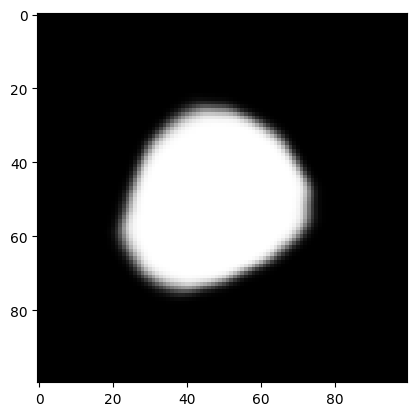

In [4]:
plt.imshow(source, cmap='gray')

### Gradient computation

In [5]:
def forward_difference_x(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[:,1:cols-1] = image[:,1:cols-1] - image[:,0:cols-2];
    d[:,0] = image[:,0] - image[:,cols-1];
    return d


def forward_difference_y(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[1:rows-1,:] = image[1:rows-1,:] - image[0:rows-2,:];
    d[0,:] = image[0,:] - image[rows-1,:];
    return d

def backward_difference_x(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[:,1:cols-1] = image[:,1:cols-1] - image[:,2:cols]
    d[:,-1] = image[:,-1] - image[:,0]
    return d

def backward_difference_y(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[1:rows-1,:] = image[1:rows-1,:] - image[2:rows,:]
    d[-1,:] = image[-1,:] - image[0,:]
    return d

def central_difference_x(image):
    cdif=(forward_difference_x(image)+backward_difference_x(image))/2
    return cdif

def central_difference_y(image):
    cdif=(forward_difference_y(image)+backward_difference_y(image))/2
    return cdif